In [120]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import os
from catboost import CatBoostRegressor

In [121]:
df_2022 = pd.read_csv('df_2022.csv')
df_2022.drop(columns=['Unnamed: 0'], inplace=True)
df_2022

thermo_min  thermo_max  thermo_mean  thermo_stDev  Field_BaseName  \
0     -5.326639    3.805920    -0.901350      1.646105             101   
1     -7.004691    2.599944    -2.353663      2.003238             102   
2     -9.139975    0.482432    -5.033321      2.029164             125   
3    -11.922635   -0.620905    -6.602255      2.359277             131   
4    -11.175456    0.007622    -5.940963      2.296216             132   
..          ...         ...          ...           ...             ...   
266   -6.747755    3.932579    -1.378813      2.080271            9229   
267   -8.022186    3.997817    -1.066971      2.390707            9232   
268   -8.407739    4.413840    -2.365105      2.705117            9235   
269   -7.210360    3.209426    -2.331099      2.204739            9236   
270   -5.695394    2.636663    -1.033780      1.767097            9240   

     thermal_integral  ndsi_min  ndsi_max  ndsi_mean  ndsi_stDev  ...  \
0         -250.643599 -0.285538  0.068926  -0.102679    0.042749  ...   
1         -647.036592 -0.280469  0.091776  -0.110388    0.043006  ...   
2        -1428.198077 -0.328495  0.146932  -0.104502    0.050457  ...   
3        -1884.861240 -0.300533  0.141743  -0.112232    0.044134  ...   
4        -1683.420525 -0.325661  0.128526  -0.113325    0.045993  ...   
..                ...       ...       ...        ...         ...  ...   
266       -393.630227 -0.304730  0.089463  -0.093494    0.047987  ...   
267       -303.551024 -0.310490  0.113326  -0.099148    0.054815  ...   
268       -664.811597 -0.300224  0.132096  -0.085930    0.056217  ...   
269       -647.159639 -0.306692  0.106545  -0.082058    0.050844  ...   
270       -316.011661 -0.266212  0.050077  -0.090803    0.044579  ...   

       Crop type       Variety  Reproduction  Sown Area       Previous Crop  \
0    –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°      102.0        –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö   
1    –û–ó. –ü–®–ï–ù–ò–¶–ê           –Æ–∫–∞            –≠–°       90.0         –°–ê–•. –°–í–ï–ö–õ–ê   
2    –û–ó. –ü–®–ï–ù–ò–¶–ê  –ê—Ö–º–∞—Ç(–æ–ø—ã—Ç—ã)            –≠–°      108.0     –ö–£–ö–£–†–£–ó–ê –≥–∏–±—Ä–∏–¥   
3    –û–ó. –ü–®–ï–ù–ò–¶–ê          –®–∞—Ä–º            –û–°        6.0            –°–û–Ø —Å–µ–º.   
4    –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°       96.0  –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö –ö–û–ù–î.   
..           ...           ...           ...        ...                 ...   
266  –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°      116.0        –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö   
267  –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°       91.0        –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö   
268  –û–ó. –ü–®–ï–ù–ò–¶–ê      –°—Ç–∏–ª—å 18            –û–°       15.0                 –°–û–Ø   
269  –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°       57.0        –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö   
270  –û–ó. –ü–®–ï–ù–ò–¶–ê      –ê–ª–µ–∫—Å–µ–∏—á            –≠–°       32.0                 –°–û–Ø   

     Primary Tillage Method  Seeder Brand  Harvested Area  Crop prod  year  
0                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54           102.0  79.275490  2022  
1                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –ë—É—Ä–≥–æ            90.0  64.145556  2022  
2                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54           108.0  72.903704  2022  
3                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54             6.0  67.216667  2022  
4                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54            96.0  66.618750  2022  
..                      ...           ...             ...        ...   ...  
266              –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54           116.0  66.125862  2022  
267              –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –ë—É—Ä–≥–æ            91.0  59.382418  2022  
268              –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54            15.0  81.400000  2022  
269              –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54            57.0  70.621053  2022  
270              –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54            32.0 

In [122]:
df_2024 = pd.read_csv('df_2024.csv')
df_2024.drop(columns=['Unnamed: 0'], inplace=True)
df_2024

thermo_min  thermo_max  thermo_mean  thermo_stDev  Field_BaseName  \
0     -5.326639    3.805920    -0.901350      1.646105             101   
1     -7.004691    2.599944    -2.353663      2.003238             102   
2     -5.945690    3.958461    -1.050637      1.934210             111   
3     -7.953142    1.430006    -3.294684      2.021073             120   
4     -9.139975    0.482432    -5.033321      2.029164             125   
..          ...         ...          ...           ...             ...   
251   -6.747755    3.932579    -1.378813      2.080271            9229   
252   -8.022186    3.997817    -1.066971      2.390707            9232   
253   -8.407739    4.413840    -2.365105      2.705117            9235   
254   -7.210360    3.209426    -2.331099      2.204739            9236   
255   -5.695394    2.636663    -1.033780      1.767097            9240   

     thermal_integral  ndsi_min  ndsi_max  ndsi_mean  ndsi_stDev  ...  \
0         -250.643599 -0.285538  0.068926  -0.102679    0.042749  ...   
1         -647.036592 -0.280469  0.091776  -0.110388    0.043006  ...   
2         -234.084168 -0.259057  0.074881  -0.094138    0.043723  ...   
3         -871.168479 -0.318730  0.186380  -0.126131    0.061896  ...   
4        -1428.198077 -0.328495  0.146932  -0.104502    0.050457  ...   
..                ...       ...       ...        ...         ...  ...   
251       -393.630227 -0.304730  0.089463  -0.093494    0.047987  ...   
252       -303.551024 -0.310490  0.113326  -0.099148    0.054815  ...   
253       -664.811597 -0.300224  0.132096  -0.085930    0.056217  ...   
254       -647.159639 -0.306692  0.106545  -0.082058    0.050844  ...   
255       -316.011661 -0.266212  0.050077  -0.090803    0.044579  ...   

     Department No.   Crop type   Variety  Reproduction  Sown Area  \
0                 1  –û–ó.–ü–®–ï–ù–ò–¶–ê      –ú–æ–Ω—ç            –≠–°      102.0   
1                 1  –û–ó.–ü–®–ï–ù–ò–¶–ê     –ë—É–º–±–∞            –≠–°       90.0   
2                 1  –û–ó.–ü–®–ï–ù–ò–¶–ê      –ú–æ–Ω—ç            –≠–°       96.0   
3                 1  –û–ó.–ü–®–ï–ù–ò–¶–ê      –ì—É—Ä—Ç            –≠–°       73.0   
4                 1  –û–ó.–ü–®–ï–ù–ò–¶–ê      –¢–∞–Ω—è            –≠–°      108.0   
..              ...         ...       ...           ...        ...   
251               9  –û–ó.–ü–®–ï–ù–ò–¶–ê     –®–∫–æ–ª–∞            –≠–°      116.0   
252               9  –û–ó.–ü–®–ï–ù–ò–¶–ê      –¢–∞–Ω—è            –≠–°       91.0   
253               9  –û–ó.–ü–®–ï–ù–ò–¶–ê       –Æ–∫–∞            –≠–°       75.0   
254               9  –û–ó.–ü–®–ï–ù–ò–¶–ê  –ö–æ–ª—å—á—É–≥–∞            –≠–°       57.0   
255               9  –û–ó.–ü–®–ï–ù–ò–¶–ê      –ì—É—Ä—Ç            –≠–°       32.0   

     Previous Crop  Seeder Brand  Harvested Area  Crop prod  year  
0          –û–ó.–†–ê–ü–°        HORSCH            84.0  80.748810  2024  
1     –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö        HORSCH            90.0  74.804444  2024  
2     –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö        HORSCH            96.0  89.211458  2024  
3              –°–û–Ø        –°–ó-5.4            73.0  79.206849  2024  
4    –ö–£–ö/–ì–ò–ë–†–ò–î–ù–ê–Ø        HORSCH           108.0  87.583333  2024  
..             ...           ...             ...        ...   ...  
251        –û–ó.–†–ê–ü–°         –ë—É—Ä–≥–æ           116.0  76.313793  2024  
252      –ö–£–ö/–ó–ï–†–ù–û         –ë—É—Ä–≥–æ            91.0  72.690110  2024  
253    –°–ê–•. –°–í–ï–ö–õ–ê        HORSCH            75.0  70.712000  2024  
254            –°–û–Ø         –ë—É—Ä–≥–æ            57.0  76.729825  2024  
255   –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö         –ë—É—Ä–≥–æ            32.0  62.390625  2024  

[256 rows x 137 columns]

In [123]:
df = pd.concat([df_2022, df_2024], axis=0)
df

thermo_min  thermo_max  thermo_mean  thermo_stDev  Field_BaseName  \
0     -5.326639    3.805920    -0.901350      1.646105             101   
1     -7.004691    2.599944    -2.353663      2.003238             102   
2     -9.139975    0.482432    -5.033321      2.029164             125   
3    -11.922635   -0.620905    -6.602255      2.359277             131   
4    -11.175456    0.007622    -5.940963      2.296216             132   
..          ...         ...          ...           ...             ...   
251   -6.747755    3.932579    -1.378813      2.080271            9229   
252   -8.022186    3.997817    -1.066971      2.390707            9232   
253   -8.407739    4.413840    -2.365105      2.705117            9235   
254   -7.210360    3.209426    -2.331099      2.204739            9236   
255   -5.695394    2.636663    -1.033780      1.767097            9240   

     thermal_integral  ndsi_min  ndsi_max  ndsi_mean  ndsi_stDev  ...  \
0         -250.643599 -0.285538  0.068926  -0.102679    0.042749  ...   
1         -647.036592 -0.280469  0.091776  -0.110388    0.043006  ...   
2        -1428.198077 -0.328495  0.146932  -0.104502    0.050457  ...   
3        -1884.861240 -0.300533  0.141743  -0.112232    0.044134  ...   
4        -1683.420525 -0.325661  0.128526  -0.113325    0.045993  ...   
..                ...       ...       ...        ...         ...  ...   
251       -393.630227 -0.304730  0.089463  -0.093494    0.047987  ...   
252       -303.551024 -0.310490  0.113326  -0.099148    0.054815  ...   
253       -664.811597 -0.300224  0.132096  -0.085930    0.056217  ...   
254       -647.159639 -0.306692  0.106545  -0.082058    0.050844  ...   
255       -316.011661 -0.266212  0.050077  -0.090803    0.044579  ...   

       Crop type       Variety  Reproduction  Sown Area       Previous Crop  \
0    –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°      102.0        –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö   
1    –û–ó. –ü–®–ï–ù–ò–¶–ê           –Æ–∫–∞            –≠–°       90.0         –°–ê–•. –°–í–ï–ö–õ–ê   
2    –û–ó. –ü–®–ï–ù–ò–¶–ê  –ê—Ö–º–∞—Ç(–æ–ø—ã—Ç—ã)            –≠–°      108.0     –ö–£–ö–£–†–£–ó–ê –≥–∏–±—Ä–∏–¥   
3    –û–ó. –ü–®–ï–ù–ò–¶–ê          –®–∞—Ä–º            –û–°        6.0            –°–û–Ø —Å–µ–º.   
4    –û–ó. –ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°       96.0  –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö –ö–û–ù–î.   
..           ...           ...           ...        ...                 ...   
251   –û–ó.–ü–®–ï–ù–ò–¶–ê         –®–∫–æ–ª–∞            –≠–°      116.0             –û–ó.–†–ê–ü–°   
252   –û–ó.–ü–®–ï–ù–ò–¶–ê          –¢–∞–Ω—è            –≠–°       91.0           –ö–£–ö/–ó–ï–†–ù–û   
253   –û–ó.–ü–®–ï–ù–ò–¶–ê           –Æ–∫–∞            –≠–°       75.0         –°–ê–•. –°–í–ï–ö–õ–ê   
254   –û–ó.–ü–®–ï–ù–ò–¶–ê      –ö–æ–ª—å—á—É–≥–∞            –≠–°       57.0                 –°–û–Ø   
255   –û–ó.–ü–®–ï–ù–ò–¶–ê          –ì—É—Ä—Ç            –≠–°       32.0        –ü–û–î–°–û–õ–ù–ï–ß–ù–ò–ö   

     Primary Tillage Method  Seeder Brand  Harvested Area  Crop prod  year  
0                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54           102.0  79.275490  2022  
1                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –ë—É—Ä–≥–æ            90.0  64.145556  2022  
2                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54           108.0  72.903704  2022  
3                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54             6.0  67.216667  2022  
4                –¥–∏—Å–∫–æ–≤–∞–Ω–∏–µ         –°–ó-54            96.0  66.618750  2022  
..                      ...           ...             ...        ...   ...  
251                     NaN         –ë—É—Ä–≥–æ           116.0  76.313793  2024  
252                     NaN         –ë—É—Ä–≥–æ            91.0  72.690110  2024  
253                     NaN        HORSCH            75.0  70.712000  2024  
254                     NaN         –ë—É—Ä–≥–æ            57.0  76.729825  2024  
255                     NaN         –ë—É—Ä–≥–æ            32.0  62.390625  2024  

[527 rows x 138 columns]

In [124]:
df.iloc[0:0+1]['Field_BaseName']

0    101
Name: Field_BaseName, dtype: int64

In [125]:
df.iloc[0:0+1]['year']

0    2022
Name: year, dtype: int64

In [126]:
df.iloc[100:100+1]['Field_BaseName']

100    1414
Name: Field_BaseName, dtype: int64

In [127]:
df.iloc[100:100+1]['year']

100    2022
Name: year, dtype: int64

In [128]:
df.iloc[250:250+1]['Field_BaseName']

250    9119
Name: Field_BaseName, dtype: int64

In [129]:
df.iloc[250:250+1]['year']

250    2022
Name: year, dtype: int64

In [130]:
df.iloc[500:500+1]['Field_BaseName']

229    2330
Name: Field_BaseName, dtype: int64

In [131]:
df.iloc[500:500+1]['year']

229    2024
Name: year, dtype: int64

In [132]:
df.iloc[0:0+1]['Field_BaseName']

0    101
Name: Field_BaseName, dtype: int64

In [133]:
# 2) –û—Ç–¥–µ–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é

y = df['Crop prod']
y_target = df['Crop prod'].copy()
X = df.drop(columns=['Crop prod', 'Field_BaseName'])

In [134]:
y

0      79.275490
1      64.145556
2      72.903704
3      67.216667
4      66.618750
         ...    
251    76.313793
252    72.690110
253    70.712000
254    76.729825
255    62.390625
Name: Crop prod, Length: 527, dtype: float64

In [135]:
# 4) –û–ø—Ä–µ–¥–µ–ª—è–µ–º, –∫–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —á–∏—Å–ª–æ–≤—ã–µ, –∞ –∫–∞–∫–∏–µ ‚Äî –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ
numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [136]:
from sklearn.preprocessing import LabelEncoder

X_with_cat_labels = X.copy()
for col in categorical_feats:
    encoder = LabelEncoder()
    X_with_cat_labels[col] = encoder.fit_transform(X[col].to_numpy().copy())

In [137]:
def remove_correlated_features(df: pd.DataFrame, threshold: float = 0.8) -> pd.DataFrame:
    """
    –£–±–∏—Ä–∞–µ—Ç –∏–∑ DataFrame —Å—Ç–æ–ª–±—Ü—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –±–æ–ª—å—à–µ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –ø–æ—Ä–æ–≥–∞.

    –ê—Ä–≥—É–º–µ–Ω—Ç—ã:
    df -- –≤—Ö–æ–¥–Ω–æ–π pandas DataFrame
    threshold -- –ø–æ—Ä–æ–≥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.8)

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    DataFrame –±–µ–∑ —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
    """
    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
    corr_matrix = df.corr().abs()

    # –°–æ–∑–¥–∞–µ–º –º–∞—Å–∫—É –¥–ª—è –≤–µ—Ä—Ö–Ω–µ–≥–æ —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫–∞ –º–∞—Ç—Ä–∏—Ü—ã (—á—Ç–æ–±—ã –Ω–µ —É—á–∏—Ç—ã–≤–∞—Ç—å –¥—É–±–ª–∏)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # –ù–∞—Ö–æ–¥–∏–º —Å—Ç–æ–ª–±—Ü—ã, –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∫–æ—Ç–æ—Ä—ã—Ö —Å –ª—é–±—ã–º –¥—Ä—É–≥–∏–º —Å—Ç–æ–ª–±—Ü–æ–º –≤—ã—à–µ threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # –£–±–∏—Ä–∞–µ–º —ç—Ç–∏ —Å—Ç–æ–ª–±—Ü—ã –∏–∑ DataFrame
    df_reduced = df.drop(columns=to_drop)
    return df_reduced

In [138]:
import pandas as pd
import numpy as np

def find_and_print_correlated_features(df: pd.DataFrame, threshold: float = 0.8) -> dict:
    """
    –ù–∞—Ö–æ–¥–∏—Ç –∏ –ø–µ—á–∞—Ç–∞–µ—Ç –¥–ª—è –∫–∞–∂–¥–æ–π —Ñ–∏—á–∏ —Å–ø–∏—Å–æ–∫ –¥—Ä—É–≥–∏—Ö —Ñ–∏—á–µ–π, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –æ–Ω–∞ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç –≤—ã—à–µ –ø–æ—Ä–æ–≥–∞.

    –ê—Ä–≥—É–º–µ–Ω—Ç—ã:
    df -- –≤—Ö–æ–¥–Ω–æ–π pandas DataFrame
    threshold -- –ø–æ—Ä–æ–≥ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.8)

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    –°–ª–æ–≤–∞—Ä—å: {—Ñ–∏—á–∞: [—Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö —Ñ–∏—á]}
    """
    corr_matrix = df.corr().abs()
    correlated_features = {}

    for col in corr_matrix.columns:
        high_corr = corr_matrix.index[(corr_matrix[col] > threshold) & (corr_matrix.index != col)].tolist()
        if high_corr:
            correlated_features[col] = high_corr

    if correlated_features:
        print("–°–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–ø–æ—Ä–æ–≥: {:.2f}):\n".format(threshold))
        for feature, correlated in correlated_features.items():
            print(f"üìå {feature} ‚Üî {', '.join(correlated)}")
    else:
        print("–ù–µ—Ç –ø–∞—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π –≤—ã—à–µ –ø–æ—Ä–æ–≥–∞ {:.2f}.".format(threshold))

    return correlated_features

In [139]:
import pandas as pd
import numpy as np

def report_feature_correlations(df: pd.DataFrame, threshold: float = 0.0) -> pd.DataFrame:
    """
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–∞–±–ª–∏—Ü—É —Å –ø–æ–ø–∞—Ä–Ω—ã–º–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è–º–∏ –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏–∑ DataFrame.

    –ê—Ä–≥—É–º–µ–Ω—Ç—ã:
    df -- –≤—Ö–æ–¥–Ω–æ–π pandas DataFrame
    threshold -- –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.0)

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    DataFrame —Å –∫–æ–ª–æ–Ω–∫–∞–º–∏: ['Feature 1', 'Feature 2', 'Correlation'], –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø–æ —É–±—ã–≤–∞–Ω–∏—é |–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏|.
    """
    # –¢–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    numeric_df = df.select_dtypes(include=[np.number])

    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
    corr_matrix = numeric_df.corr()

    # –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    correlations = []

    # –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤–µ—Ä—Ö–Ω–µ–º—É —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            feature_1 = corr_matrix.columns[i]
            feature_2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) >= threshold:
                correlations.append({
                    'Feature 1': feature_1,
                    'Feature 2': feature_2,
                    'Correlation': corr_value
                })

    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ DataFrame –∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ —É–±—ã–≤–∞–Ω–∏—é |–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏|
    result_df = pd.DataFrame(correlations)
    result_df['Abs Correlation'] = result_df['Correlation'].abs()
    result_df = result_df.sort_values(by='Abs Correlation', ascending=False).drop(columns='Abs Correlation')

    return result_df.reset_index(drop=True)


In [140]:
correlations_df = report_feature_correlations(X_with_cat_labels.copy(), threshold=0.9)
print(correlations_df)

                             Feature 1                            Feature 2  \
0                    precipitation_sum             precipitation__aggr_mean   
1          soil_moisture_0_to_7cm_mean    soil_moisture_0_to_7cm__aggr_mean   
2           et0_fao_evapotranspiration       et0_fao_evapotranspiration_sum   
3          wind_direction_10m_dominant           winddirection_10m_dominant   
4       shortwave_radiation__aggr_mean  global_tilted_irradiance__aggr_mean   
...                                ...                                  ...   
2323                wind_gusts_10m_min       wind_direction_100m__aggr_mean   
2324                 precipitation_sum     soil_temperature_0_to_100cm_mean   
2325  soil_temperature_0_to_100cm_mean             precipitation__aggr_mean   
2326                   rain__aggr_mean       wind_direction_100m__aggr_mean   
2327                          rain_sum       wind_direction_100m__aggr_mean   

      Correlation  
0        1.000000  
1        1.

In [141]:
correlations_df.to_csv('correlations_df.csv', index=False)

In [142]:
find_and_print_correlated_features(X_with_cat_labels.copy(), 0.9)

–°–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–ø–æ—Ä–æ–≥: 0.90):

üìå thermo_mean ‚Üî thermal_integral
üìå thermal_integral ‚Üî thermo_mean
üìå ndsi_min ‚Üî ndwi_min
üìå ndsi_mean ‚Üî ndsi_integral
üìå ndsi_integral ‚Üî ndsi_mean
üìå ndwi_min ‚Üî ndsi_min
üìå ndwi_mean ‚Üî ndwi_integral
üìå ndwi_integral ‚Üî ndwi_mean
üìå ndmi_mean ‚Üî ndmi_integral
üìå ndmi_integral ‚Üî ndmi_mean
üìå ndvi_mean ‚Üî ndvi_integral
üìå ndvi_integral ‚Üî ndvi_mean
üìå et0_fao_evapotranspiration ‚Üî shortwave_radiation_sum, wind_direction_10m_dominant, apparent_temperature_min, weather_code, temperature_2m_mean, temperature_2m_max, temperature_2m_min, apparent_temperature_mean, apparent_temperature_max, sunrise, sunset, sunshine_duration, precipitation_hours, snowfall_sum, rain_sum, precipitation_sum, wind_gusts_10m_min, winddirection_10m_dominant, pressure_msl_min, pressure_msl_mean, snowfall_water_equivalent_sum, relative_humidity_2m_min, relative_humidity_2m_max, relative_humidit

{'thermo_mean': ['thermal_integral'],
 'thermal_integral': ['thermo_mean'],
 'ndsi_min': ['ndwi_min'],
 'ndsi_mean': ['ndsi_integral'],
 'ndsi_integral': ['ndsi_mean'],
 'ndwi_min': ['ndsi_min'],
 'ndwi_mean': ['ndwi_integral'],
 'ndwi_integral': ['ndwi_mean'],
 'ndmi_mean': ['ndmi_integral'],
 'ndmi_integral': ['ndmi_mean'],
 'ndvi_mean': ['ndvi_integral'],
 'ndvi_integral': ['ndvi_mean'],
 'et0_fao_evapotranspiration': ['shortwave_radiation_sum',
  'wind_direction_10m_dominant',
  'apparent_temperature_min',
  'weather_code',
  'temperature_2m_mean',
  'temperature_2m_max',
  'temperature_2m_min',
  'apparent_temperature_mean',
  'apparent_temperature_max',
  'sunrise',
  'sunset',
  'sunshine_duration',
  'precipitation_hours',
  'snowfall_sum',
  'rain_sum',
  'precipitation_sum',
  'wind_gusts_10m_min',
  'winddirection_10m_dominant',
  'pressure_msl_min',
  'pressure_msl_mean',
  'snowfall_water_equivalent_sum',
  'relative_humidity_2m_min',
  'relative_humidity_2m_max',
  'relat

In [143]:
X_without_corr = remove_correlated_features(X_with_cat_labels.copy())
print(X_without_corr.columns)

model = CatBoostRegressor(verbose=0, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
# scoring="r2" ‚Äî —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º R¬≤ –Ω–∞ –∫–∞–∂–¥–æ–º —Ñ–æ–ª–¥–µ
scores = cross_val_score(model, X_with_cat_labels, y, cv=cv, scoring='r2')

Index(['thermo_min', 'thermo_max', 'thermo_stDev', 'ndsi_min', 'ndsi_max',
       'ndsi_mean', 'ndsi_stDev', 'ndwi_mean', 'ndmi_min', 'ndmi_max',
       'ndmi_mean', 'ndmi_stDev', 'ndvi_max', 'ndvi_mean',
       'et0_fao_evapotranspiration', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'daylight_duration', 'wind_speed_10m_mean',
       'wind_gusts_10m_mean', 'surface_pressure_max', 'pressure_msl_max',
       'soil_moisture_7_to_28cm_mean', 'soil_moisture_100_to_255cm__aggr_mean',
       'is_day__aggr_mean', 'terrestrial_radiation__aggr_mean',
       'Department No.', 'Crop type', 'Variety', 'Reproduction', 'Sown Area',
       'Previous Crop', 'Seeder Brand'],
      dtype='object')


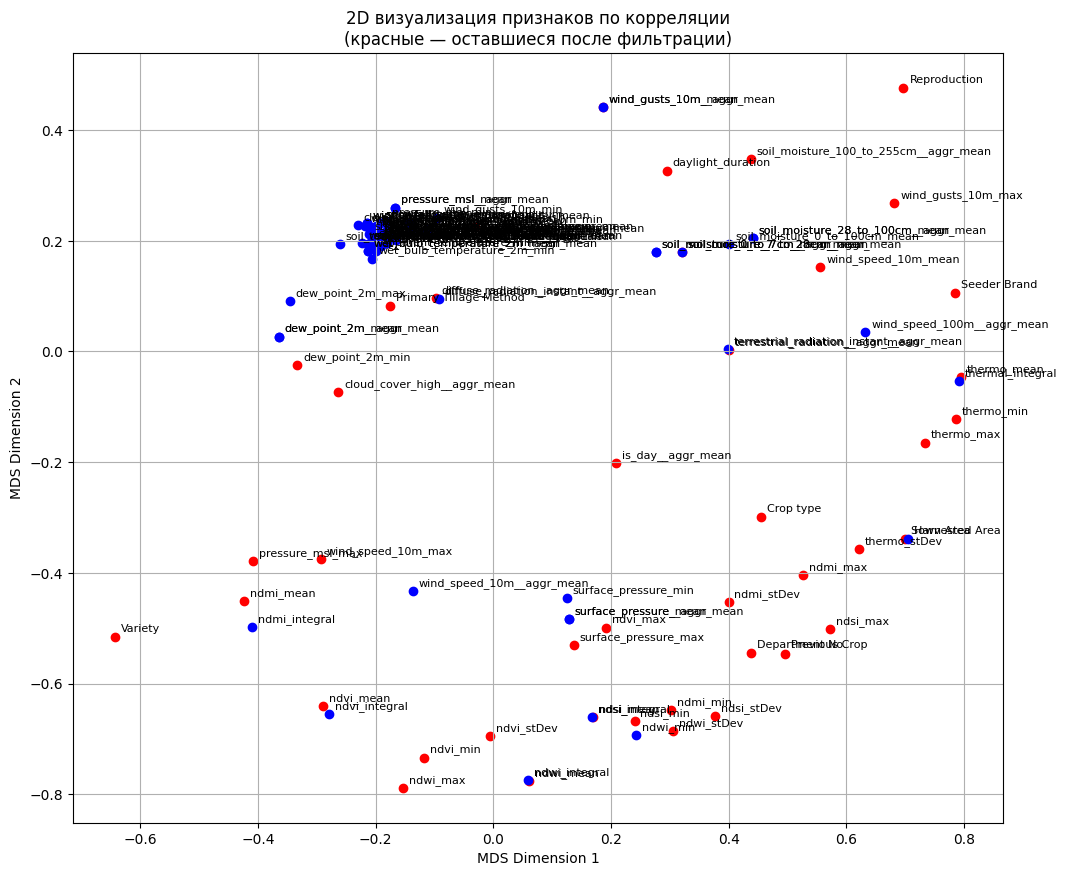

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# 1. –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
corr_matrix = X_with_cat_labels.corr().abs()

# 2. –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –≤ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
# –ß–µ–º –≤—ã—à–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è -> —Ç–µ–º –±–ª–∏–∂–µ
distance_matrix = 1 - corr_matrix

# 3. –ü—Ä–∏–º–µ–Ω–∏–º MDS –¥–ª—è –ø—Ä–æ–µ–∫—Ü–∏–∏ –≤ 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
X_2D = mds.fit_transform(distance_matrix)

# 4. –ü–æ–ª—É—á–∏–º –∏–º–µ–Ω–∞ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤


remaining_features = remove_correlated_features(X_with_cat_labels, 0.9).columns

# 5. –ü–æ—Å—Ç—Ä–æ–∏–º scatter plot
plt.figure(figsize=(12, 10))

for i, col in enumerate(corr_matrix.columns):
    color = 'red' if col in remaining_features else 'blue'
    plt.scatter(X_2D[i, 0], X_2D[i, 1], color=color)
    plt.text(X_2D[i, 0] + 0.01, X_2D[i, 1] + 0.01, col, fontsize=8)

plt.title('2D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏\n(–∫—Ä–∞—Å–Ω—ã–µ ‚Äî –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏)')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

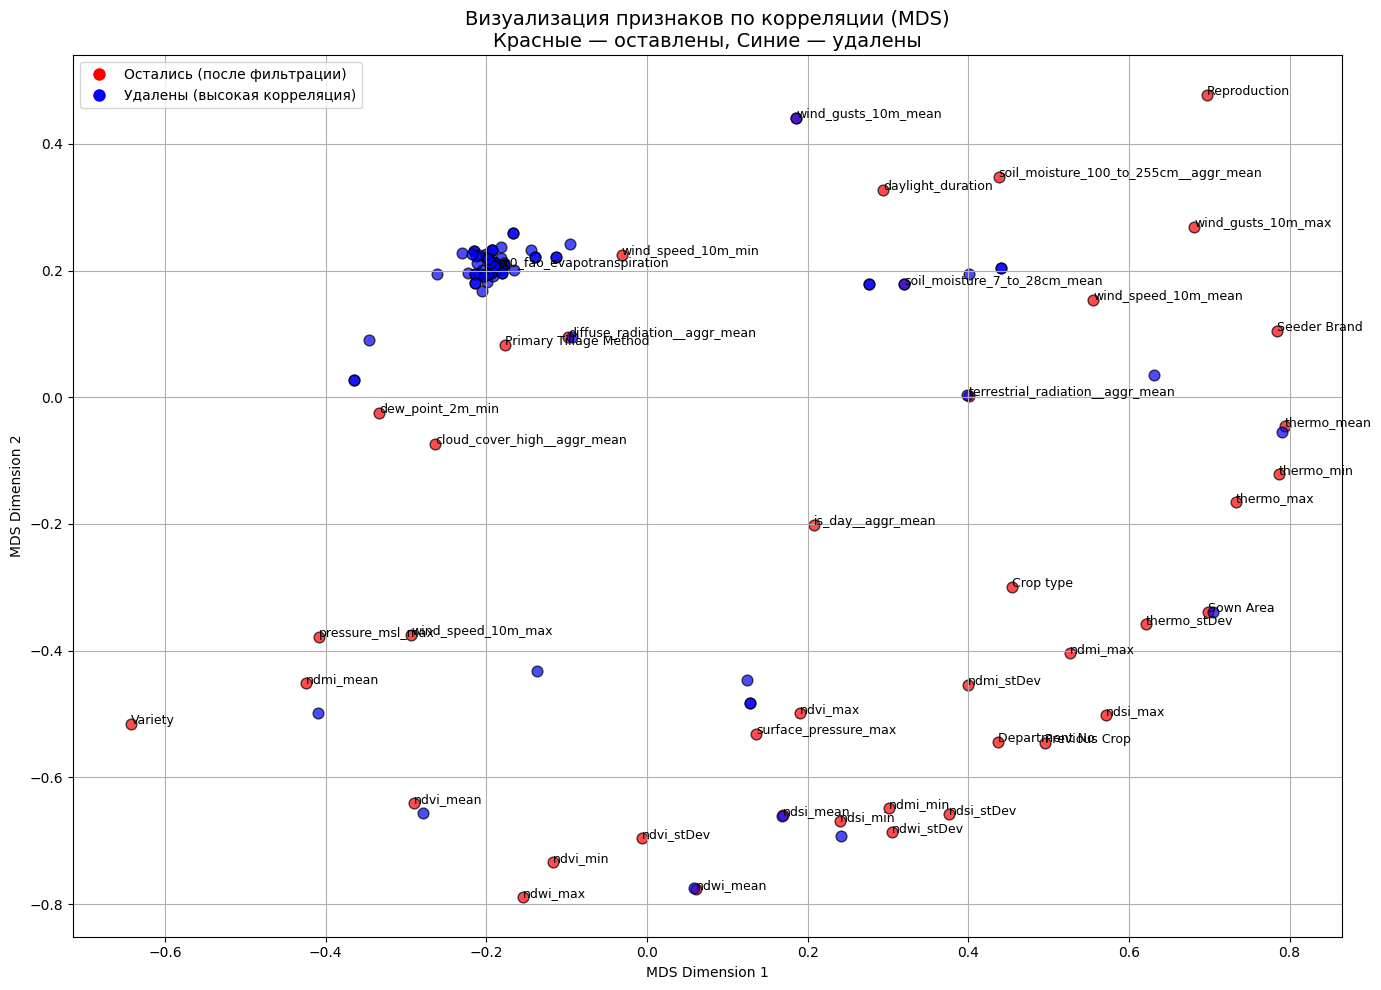

In [145]:
import matplotlib.pyplot as plt
#from adjustText import adjust_text

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ
plt.figure(figsize=(14, 10))
texts = []

for i, col in enumerate(corr_matrix.columns):
    x, y = X_2D[i, 0], X_2D[i, 1]
    is_remaining = col in remaining_features
    color = 'red' if is_remaining else 'blue'
    label = col if is_remaining else None  # –ü–æ–¥–ø–∏—Å—ã–≤–∞–µ–º —Ç–æ–ª—å–∫–æ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è
    plt.scatter(x, y, color=color, s=60, alpha=0.7, edgecolor='k', label='–û—Å—Ç–∞–ª—Å—è' if is_remaining else '–£–¥–∞–ª—ë–Ω')
    if label:
        texts.append(plt.text(x, y, label, fontsize=9))

# –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —Ä–∞—Å–ø–∏—Ö–∏–≤–∞–µ–º –ø–æ–¥–ø–∏—Å–∏, —á—Ç–æ–±—ã –Ω–µ –Ω–∞–∫–ª–∞–¥—ã–≤–∞–ª–∏—Å—å
#adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# –î–æ–±–∞–≤–∏–º –ª–µ–≥–µ–Ω–¥—É
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='–û—Å—Ç–∞–ª–∏—Å—å (–ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏)', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='–£–¥–∞–ª–µ–Ω—ã (–≤—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=handles, loc='best')

plt.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (MDS)\n–ö—Ä–∞—Å–Ω—ã–µ ‚Äî –æ—Å—Ç–∞–≤–ª–µ–Ω—ã, –°–∏–Ω–∏–µ ‚Äî —É–¥–∞–ª–µ–Ω—ã', fontsize=14)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.tight_layout()
plt.savefig(f"img/mds_map.jpg",
            #bbox_inches='tight', 
            dpi=1500)
plt.show()


In [146]:
import seaborn as sns

plt.figure(figsize=(30, 30))
X_without_corr_y = X_without_corr.copy()
X_without_corr_y['target'] = y_target
sns.heatmap(X_without_corr_y.corr(), annot=True, cmap='coolwarm')

plt.title("–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞")
#plt.show()
output_dir = "img/heatmap_img"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f"img/heatmap_img/heatmap.jpg",
            #bbox_inches='tight', 
            dpi=1500)
plt.savefig(f"img/heatmap_img/heatmap.svg",
            #bbox_inches='tight',
            )
plt.show()
#plt.close()

In [147]:
from catboost import CatBoostClassifier, Pool

X_for_feat = X_without_corr.copy()
#X_for_feat = X_for_feat.drop(['Harvested Area', 'Sown Area'], axis=1)

# –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_for_feat, y_target.to_numpy().copy())

# –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç–∏
pool = Pool(X_for_feat,y_target.to_numpy().copy())
importances = model.get_feature_importance(pool, type='FeatureImportance')

# –°–æ–±–∏—Ä–∞–µ–º –≤ Series –∏ –æ—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ø-10
fi = pd.Series(importances, index=X_for_feat.columns)
top10 = fi.sort_values(ascending=False).head(10)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ (–æ—Ç —Å–∞–º—ã—Ö –º–µ–Ω–µ–µ –≤–∞–∂–Ω—ã—Ö –≤ —Ç–æ–ø-10 –∫ —Å–∞–º—ã–º –≤–∞–∂–Ω—ã–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —á—Ç–µ–Ω–∏—è)
plt.figure(figsize=(10, 6))
top10.sort_values().plot(kind='barh')
plt.title('–¢–æ–ø-10 —Å–∞–º—ã—Ö –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

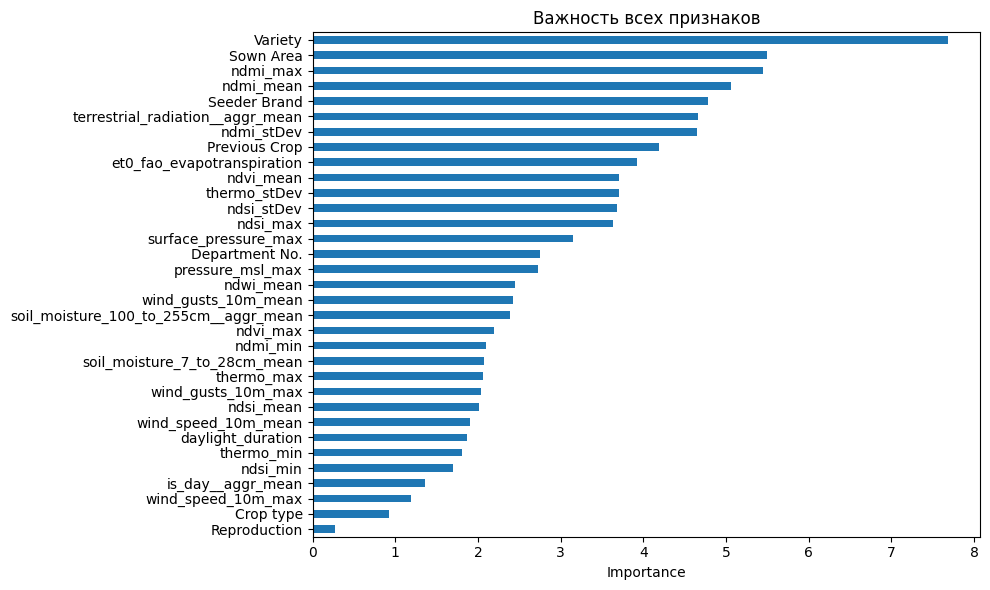

In [148]:
fi = pd.Series(importances, index=X_for_feat.columns)
top10 = fi.sort_values(ascending=False).head(100)

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ (–æ—Ç —Å–∞–º—ã—Ö –º–µ–Ω–µ–µ –≤–∞–∂–Ω—ã—Ö –≤ —Ç–æ–ø-10 –∫ —Å–∞–º—ã–º –≤–∞–∂–Ω—ã–º –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —á—Ç–µ–Ω–∏—è)
plt.figure(figsize=(10, 6))
top10.sort_values().plot(kind='barh')
plt.title('–í–∞–∂–Ω–æ—Å—Ç—å –≤—Å–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

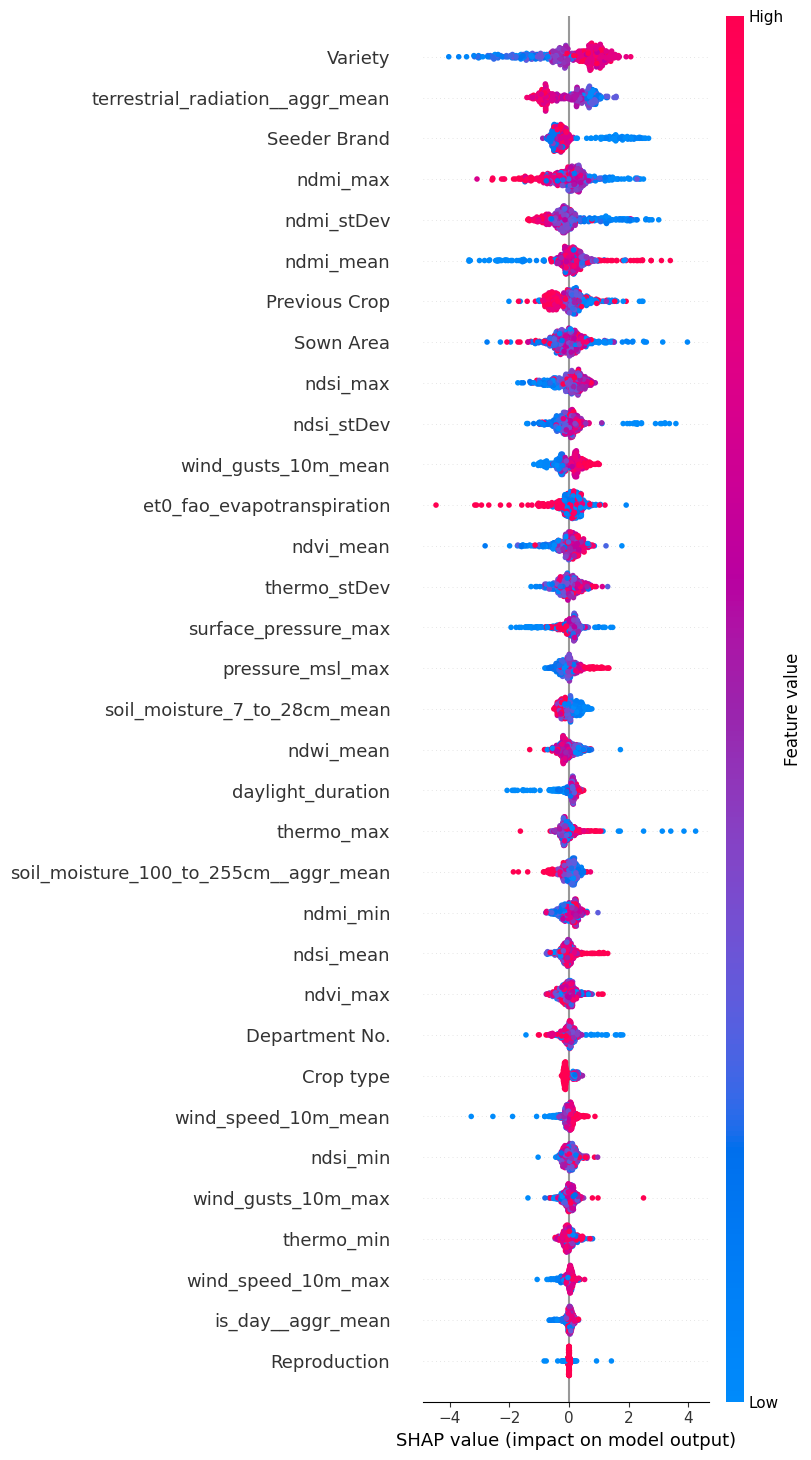

<Figure size 640x480 with 0 Axes>

In [149]:
import shap

explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_for_feat)

# 6. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è 
shap.summary_plot(shap_values, X_for_feat, show=True, max_display=X_for_feat.shape[1])  # <- –æ—Ç–∫–ª—é—á–∞–µ–º –∞–≤—Ç–æ–æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ
output_dir = "img/shap_img"
os.makedirs(output_dir, exist_ok=True)  # –°–æ–∑–¥–∞—ë—Ç –≤—Å–µ –ø–æ–¥–¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏, –µ—Å–ª–∏ –∏—Ö –Ω–µ—Ç
plt.savefig(f"{output_dir}/shap_img_1.png", bbox_inches='tight', dpi=300)

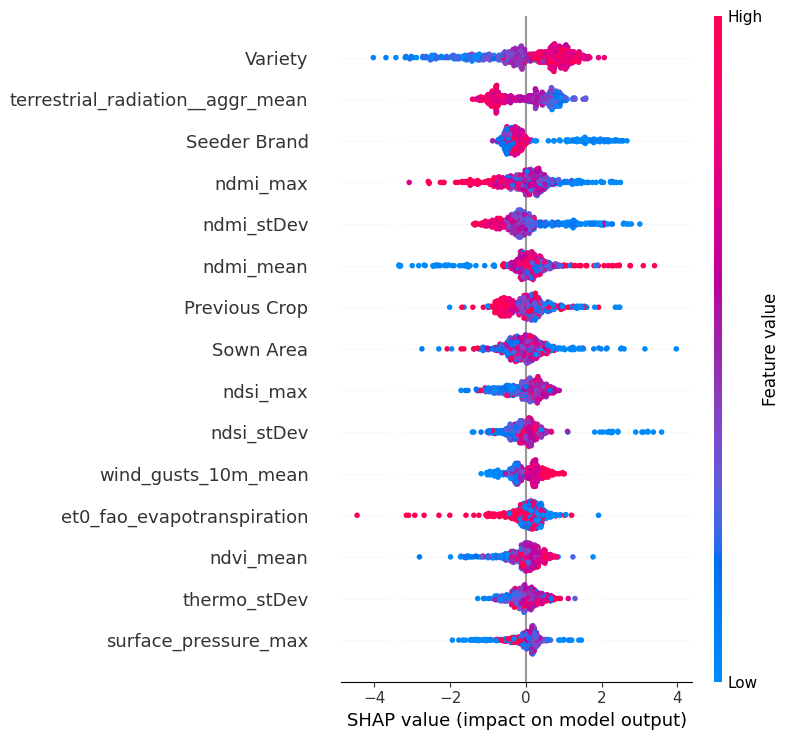

<Figure size 640x480 with 0 Axes>

In [150]:
import shap

explainer = shap.TreeExplainer(model)


shap_values = explainer.shap_values(X_for_feat)

# 6. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è 
shap.summary_plot(shap_values, X_for_feat, show=True, max_display=15)
output_dir = "img/shap_img"
os.makedirs(output_dir, exist_ok=True)  # –°–æ–∑–¥–∞—ë—Ç –≤—Å–µ –ø–æ–¥–¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏, –µ—Å–ª–∏ –∏—Ö –Ω–µ—Ç
plt.savefig(f"{output_dir}/shap_img_2.png", bbox_inches='tight', dpi=300)

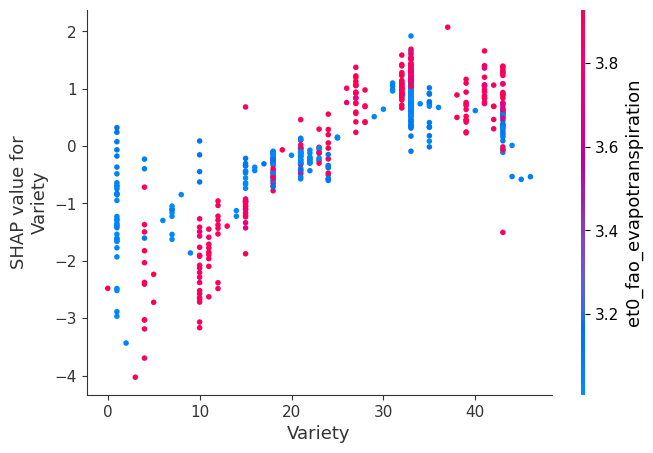

In [151]:
shap.dependence_plot('Variety', shap_values, X_for_feat, show=True)

In [152]:
X_for_feat.iloc[0:0 + 1]

thermo_min  thermo_max  thermo_stDev  ndsi_min  ndsi_max  ndsi_mean  \
0   -5.326639     3.80592      1.646105 -0.285538  0.068926  -0.102679   

   ndsi_stDev  ndwi_mean  ndmi_min  ndmi_max  ...  \
0    0.042749  -0.239069 -0.012095  0.301168  ...   

   soil_moisture_100_to_255cm__aggr_mean  is_day__aggr_mean  \
0                                0.33283           0.545991   

   terrestrial_radiation__aggr_mean  Department No.  Crop type  Variety  \
0                        349.607811               1          0       33   

   Reproduction  Sown Area  Previous Crop  Seeder Brand  
0             2      102.0             17            14  

[1 rows x 33 columns]

In [153]:
X.iloc[0:0 + 1]['thermo_min']

0   -5.326639
Name: thermo_min, dtype: float64

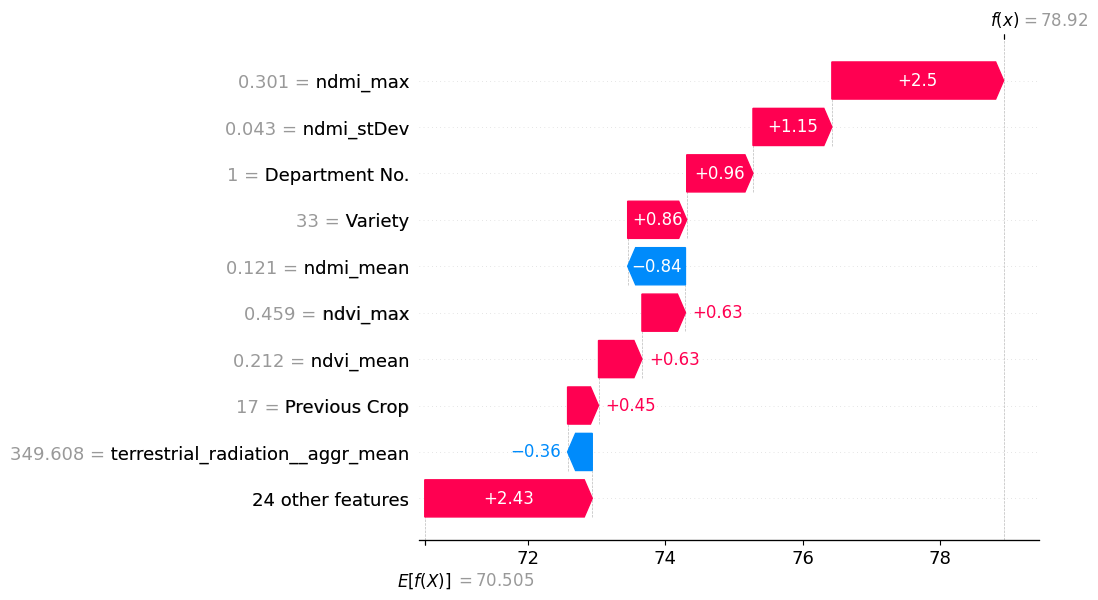

In [154]:
shap_explanation = explainer(X_for_feat.iloc[0:0 + 1])
fig = plt.figure(figsize=(12, 8 ))  # –∑–∞–¥–∞—ë–º –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ä–∞–∑–º–µ—Ä
# –°—Ç—Ä–æ–∏–º waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)

In [155]:
shap_explanation = explainer(X_for_feat.iloc[100:100 + 1])
fig = plt.figure(figsize=(12, 8 ))  # –∑–∞–¥–∞—ë–º –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ä–∞–∑–º–µ—Ä
# –°—Ç—Ä–æ–∏–º waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)

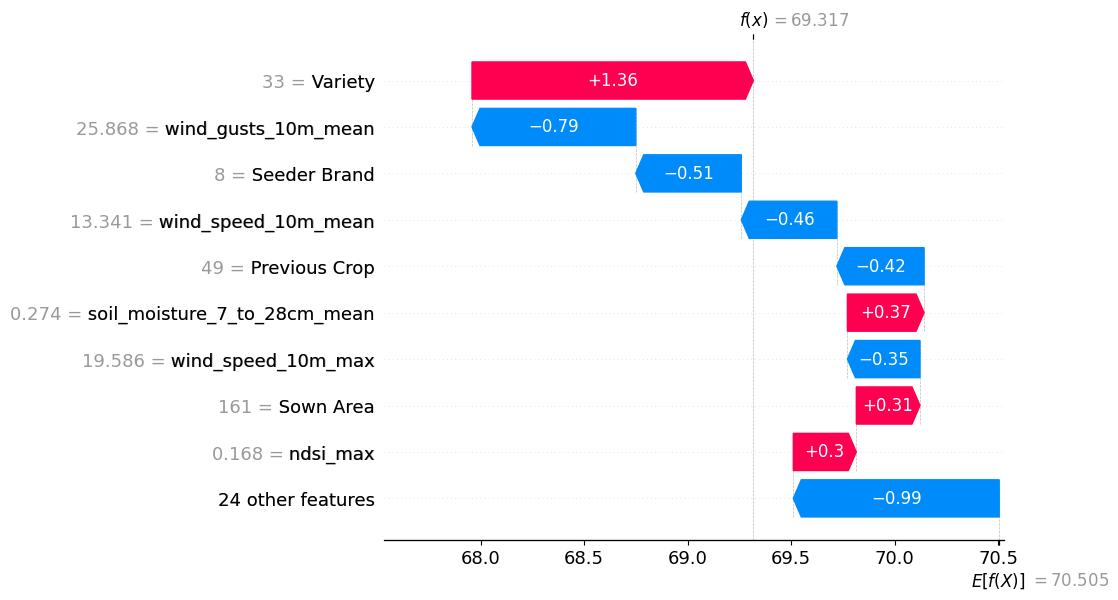

In [156]:
shap_explanation = explainer(X_for_feat.iloc[500:500 + 1])
fig = plt.figure(figsize=(12, 8 ))  # –∑–∞–¥–∞—ë–º –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ä–∞–∑–º–µ—Ä
# –°—Ç—Ä–æ–∏–º waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)

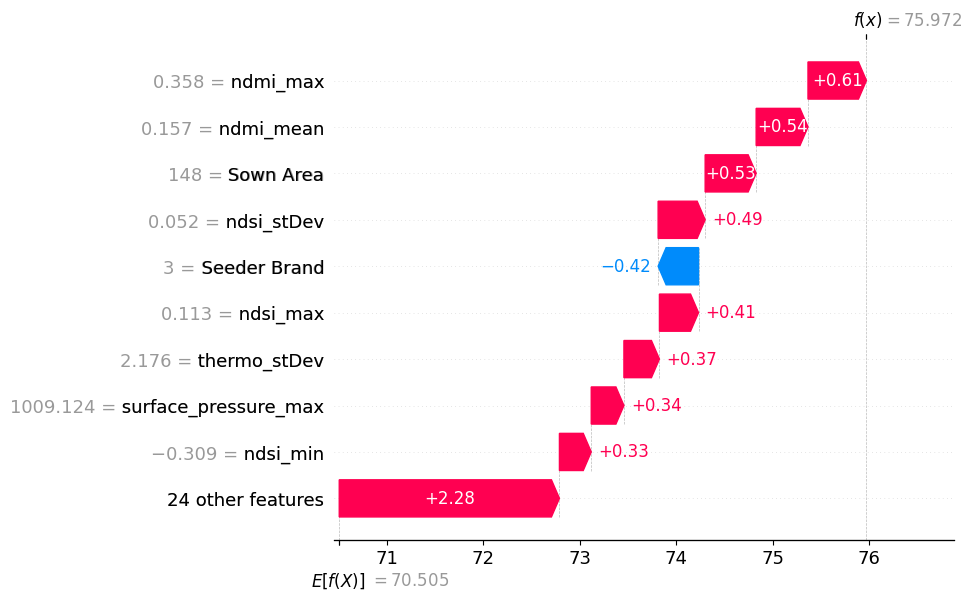

In [157]:
shap_explanation = explainer(X_for_feat.iloc[250:250 + 1])
fig = plt.figure(figsize=(12, 8 ))  # –∑–∞–¥–∞—ë–º –ø–æ–¥—Ö–æ–¥—è—â–∏–π —Ä–∞–∑–º–µ—Ä
# –°—Ç—Ä–æ–∏–º waterfall plot
shap.plots.waterfall(shap_explanation[0], show = True)